Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

Loading datasets

In [3]:
testdat = pd.read_csv('sample_data/california_housing_test.csv')
traindat = pd.read_csv('sample_data/california_housing_train.csv')

Data Exploration

In [28]:
traindat.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,8.632841,7.157735,6.923629,6.159095,1.4936,66900.0
1,-114.47,34.40,19.0,8.942592,7.550661,7.029973,6.139885,1.8200,80100.0
2,-114.56,33.69,17.0,6.580639,5.164786,5.811141,4.770685,1.6509,85700.0
3,-114.57,33.64,14.0,7.314553,5.823046,6.246107,5.424950,3.1917,73400.0
4,-114.57,33.57,20.0,7.282761,5.789960,6.437752,5.572154,1.9250,65500.0


In [ ]:
traindat.info()

In [8]:
X_train = traindat.drop('median_house_value',axis=1)
y_train = traindat['median_house_value']

In [9]:
X_test = testdat.drop('median_house_value',axis=1)
y_test = testdat['median_house_value']

In [17]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((17000, 8), (17000,), (3000, 8), (3000,))

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

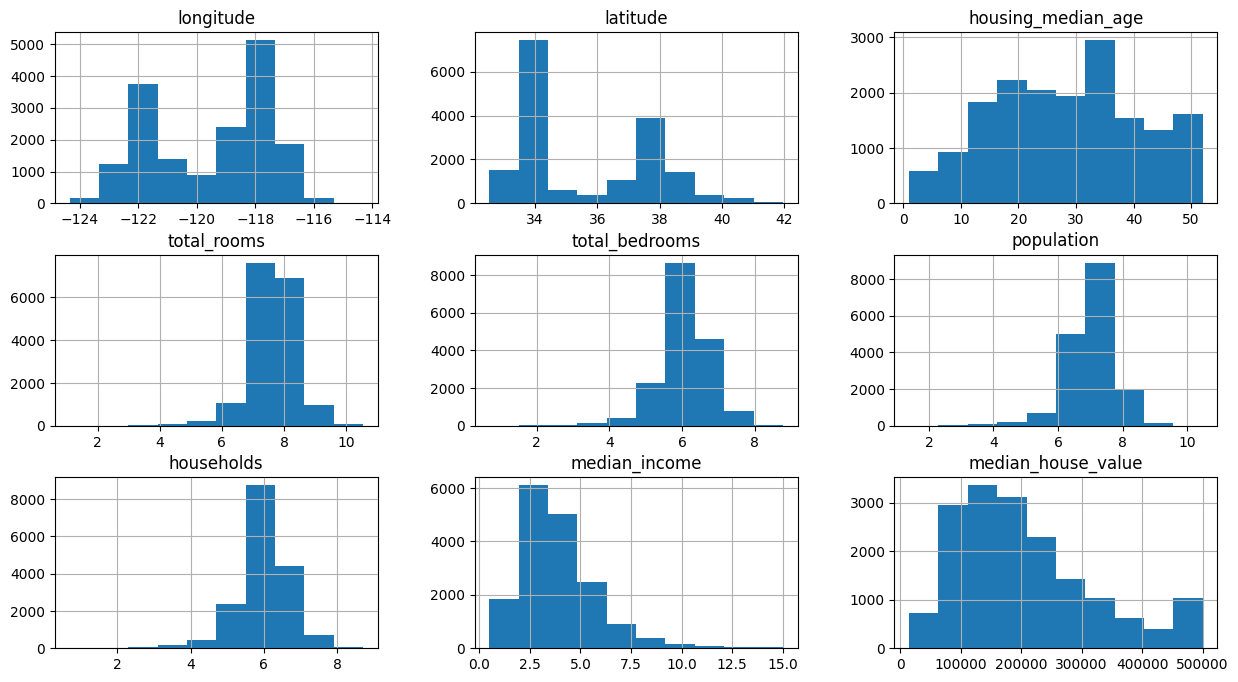

In [27]:
traindat.hist(figsize = (15,8))

<Axes: >

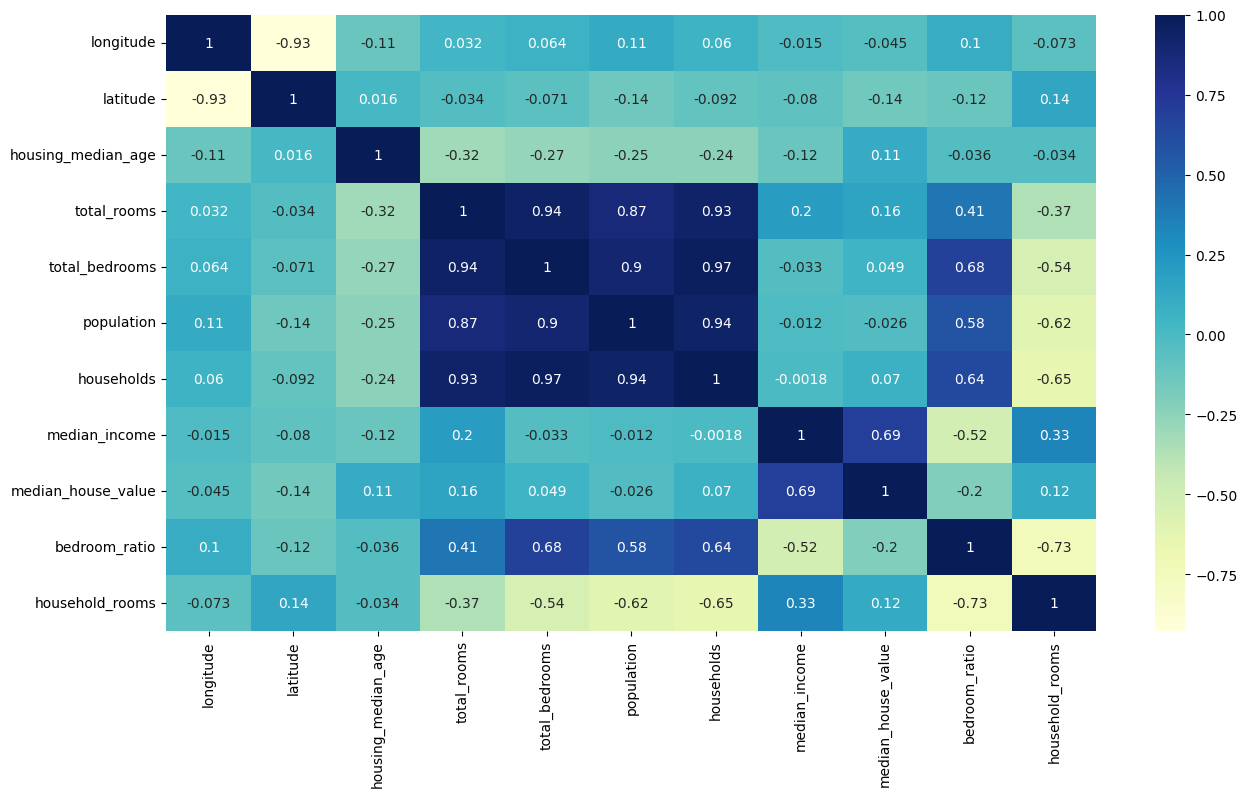

In [30]:
plt.figure(figsize = (15,8))
sns.heatmap(traindat.corr(),annot = True, cmap = 'YlGnBu')

Pre-processing

In [4]:
traindat['total_rooms'] = np.log(traindat['total_rooms'] + 1)
traindat['total_bedrooms'] = np.log(traindat['total_bedrooms'] + 1)
traindat['population'] = np.log(traindat['population'] + 1)
traindat['households'] = np.log(traindat['households'] + 1)

In [5]:
traindat['bedroom_ratio'] = traindat['total_bedrooms'] / traindat['total_rooms']
traindat['household_rooms'] = traindat['total_rooms'] / traindat['households']

In [6]:
testdat['total_rooms'] = np.log(testdat['total_rooms'] + 1)
testdat['total_bedrooms'] = np.log(testdat['total_bedrooms'] + 1)
testdat['population'] = np.log(testdat['population'] + 1)
testdat['households'] = np.log(testdat['households'] + 1)

In [7]:
testdat['bedroom_ratio'] = testdat['total_bedrooms'] / testdat['total_rooms']
testdat['household_rooms'] = testdat['total_rooms'] / testdat['households']

Linear Regression

In [8]:
reg = LinearRegression()
X_train = traindat.drop(['median_house_value'],axis = 1)
y_train = traindat['median_house_value']
scaler = StandardScaler()
X_trscaled = scaler.fit_transform(X_train)

In [9]:
reg.fit(X_trscaled,y_train)

LinearRegression()

In [10]:
X_test = testdat.drop(['median_house_value'],axis = 1)
y_test = testdat['median_house_value']
x_tstscaled = scaler.transform(X_test)

In [11]:
reg.score(x_tstscaled,y_test)

0.6418764639764117

Random Forest Model

In [ ]:
forest = RandomForestClassifier(n_estimators = 50, min_samples_split = 2)

forest.fit(X_train,y_train)
forest.score(X_train,y_train)